## Day 1: Of Numerical Integration and Python

Welcome to Day 1! Today, we start with our discussion of what Numerical Integration is.

### What is Numerical Integration?

From the point of view of a theoretician, the ideal form of the solution to a differential equation given the initial conditions, i.e. an initial value problem (IVP), would be a formula for the solution function. But sometimes obtaining a formulaic solution is not always easy, and in many cases is absolutely impossible. So, what do we do when faced with a differential equation that we cannot solve? If you are only looking for long term behavior of a solution you can always sketch a direction field. This can be done without too much difficulty for some fairly complex differential equations that we can’t solve to get exact solutions. But, what if we need to determine how a specific solution behaves, including some values that the solution will take? In that case, we have to rely on numerical methods for solving the IVP such as euler's method or the Runge-Kutta Methods. 

#### Euler's Method for Numerical Integration

We use Euler's Method to generate a numerical solution to an initial value problem of the form:

$$\frac{dx}{dt} = f(x, t)$$
$$x(t_o) = x_o$$

Firstly, we decide the interval over which we desire to find the solution, starting at the initial condition. We break this interval into small subdivisions of a fixed length $\epsilon$. Then, using the initial condition as our starting point, we generate the rest of the solution by using the iterative formulas:

$$t_{n+1} = t_n + \epsilon$$
$$x_{n+1} = x_n + \epsilon f(x_n, t_n)$$

to find the coordinates of the points in our numerical solution. We end this process once we have reached the end of the desired interval.

The best way to understand how it works is from the following diagram:

<img src="euler.png" alt="euler.png" width="400"/>

#### Euler's Method in Python
Let $\frac{dx}{dt}=f(x,t)$, we want to find $x(t)$ over $t\in[0,2)$, given that $x(0)=1$ and $f(x,t) = 5x$. The exact solution of this equation would be $x(t) = e^{5t}$.


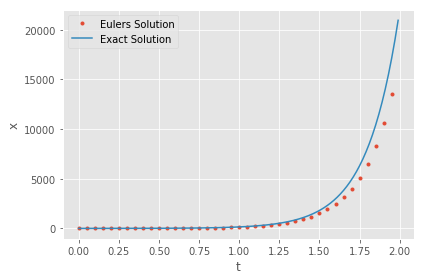

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def f(x,t): # define the function f(x,t)
    return 5*x

epsilon = 0.01 # define timestep

t = np.arange(0,2,epsilon) # define an array for t
x = np.zeros(t.shape) # define an array for x

x[0]= 1 # set initial condition

for i in range(1,t.shape[0]):
    x[i] = epsilon*f(x[i-1],t[i-1])+x[i-1] # Euler Integration Step


plt.plot(t[::5],x[::5],".",label="Eulers Solution")
plt.plot(t,np.exp(5*t),label="Exact Solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.tight_layout()
fig = plt.gcf()
fig.savefig("fig_2.eps",format='eps')
plt.show()



In [2]:
plt.style.available

['bmh',
 'ggplot',
 'seaborn-notebook',
 'dark_background',
 'classic',
 'seaborn-whitegrid',
 'seaborn-talk',
 'grayscale',
 'seaborn-paper',
 'seaborn-pastel',
 'Solarize_Light2',
 'tableau-colorblind10',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-ticks',
 'seaborn-darkgrid',
 'fast',
 'seaborn-bright',
 'seaborn-muted',
 'seaborn',
 'fivethirtyeight',
 'seaborn-deep',
 'seaborn-poster',
 'seaborn-white',
 '_classic_test',
 'seaborn-dark']

#### Euler and Vectors

Euler's Method also applies to vectors and can solve simultaneous differential equations.

The Initial Value problem now becomes:

$$\frac{d\vec{X}}{dt} = \vec{f}(\vec{X}, t)$$
$$\vec{X}(t_o) = \vec{X_o}$$

where $\vec{X}=[X_1,X_2...]$ and $\vec{f}(\vec{X}, t)=[f_1(\vec{X}, t),f_2(\vec{X}, t)...]$.

The Euler's Method becomes:

$$t_{n+1} = t_n + \epsilon$$
$$\vec{X_{n+1}} = \vec{X_n} + \epsilon \vec{f}(\vec{X_n}, t_n)$$

Let $\frac{d\vec{X}}{dt}=f(\vec{X},t)$, we want to find $\vec{X}(t)$ over $t\in[0,2)$, given that $\vec{X}(t)=[x,y]$, $\vec{X}(0)=[1,0]$ and $f(\vec{X},t) = [x-y,y-x]$.

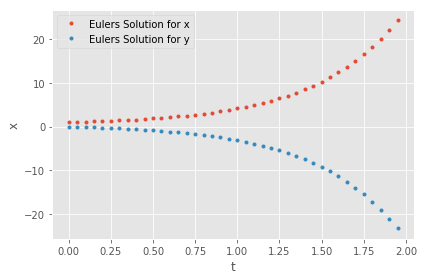

In [4]:
def f(X,t): # define the function f(x,t)
    x,y = X
    return np.array([x-y,y-x])

epsilon = 0.01 # define timestep

t = np.arange(0,2,epsilon) # define an array for t
X = np.zeros((2,t.shape[0])) # define an array for x

X[:,0]= [1,0] # set initial condition

for i in range(1,t.shape[0]):
    X[:,i] = epsilon*f(X[:,i-1],t[i-1])+X[:,i-1] # Euler Integration Step


plt.plot(t[::5],X[0,::5],".",label="Eulers Solution for x")
plt.plot(t[::5],X[1,::5],".",label="Eulers Solution for y")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.tight_layout()
fig = plt.gcf()
fig.savefig("fig3.eps",format='eps')
plt.show()

#### A Generalized function for Euler Integration

Now, we create a generalized function that takes in 3 inputs ie. the function $\vec{f}(\vec{y},t)$ when $\frac{d\vec{y}}{dt}=f(\vec{y},t)$, the time array, and initial vector $\vec{y_0}$.

##### Algorithm
- Get the required inputs: function $\vec{f}(\vec{y},t)$, initial condition vector $\vec{y_0}$ and time series $t$. Entering a time series $t$ allows for greater control over $\epsilon$ as it can now vary for each timestep. The only difference in the Euler's Method is now : $\epsilon\rightarrow\epsilon(t_n)$.
- Check if the input is of the correct datatype ie. floating point decimal.
- Create a zero matrix to hold the output.
- For each timestep, perform the euler method updation with variable $\epsilon$ and store it in the output matrix.
- Return the output timeseries matrix.

In [5]:
def check_type(y,t): # Ensure Input is Correct
    return y.dtype == np.floating and t.dtype == np.floating

class _Integrator():
    
    def integrate(self,func,y0,t):
        time_delta_grid = t[1:] - t[:-1]
        
        y = np.zeros((y0.shape[0],t.shape[0]))
        y[:,0] = y0
        
        for i in range(time_delta_grid.shape[0]):
            y[:,i+1]= time_delta_grid[i]*func(y[:,i],t[i])+y[:,i]
        return y

def odeint_euler(func,y0,t):
    y0 = np.array(y0)
    t = np.array(t)
    if check_type(y0,t):
        return _Integrator().integrate(func,y0,t)
    else:
        print("error encountered")

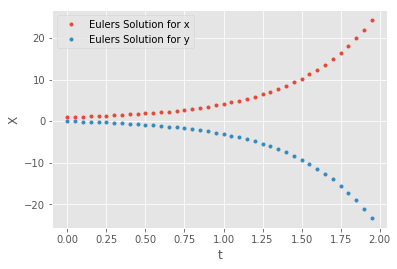

In [6]:
solution = odeint_euler(f,[1.,0.],t)

plt.plot(t[::5],solution[0,::5],".",label="Eulers Solution for x")
plt.plot(t[::5],solution[1,::5],".",label="Eulers Solution for y")
plt.xlabel("t")
plt.ylabel("X")
plt.legend()
plt.show()

####  Runge-Kutta Methods for Numerical Integration

The formula for the Euler method is $x_{n+1}=x_n + \epsilon f(x_n,t_n)$ which takes a solution from $t_n$ to $t_{n+1}=t_n+\epsilon$. One might notice there is an inherent assymetry in the formula. It advances the solution through an interval $\epsilon$, but uses the derivative information at only the start of the interval. This results in an error in the order of $O(\epsilon^2)$. But, what if we take a trial step and evaluate the derivative at the midpoint of the update interval to evaluate the value of $y_{n+1}$? Take the equations:

$$k_1=\epsilon f(x_n,t_n)$$

$$k_2=\epsilon f(x_n+\frac{k_1}{2},t_n+\frac{\epsilon}{2})$$ 

$$y_{n+1}=y_n+k_2+O(\epsilon^3)$$

The symmetrization removes the O($\epsilon^2$) error term and now the method is second order and called the second order Runge-Kutta method or the midpoint method. You can look at this method graphically as follows:

<img src="rk2.png" alt="rk2.png" width="400"/>

But we do not have to stop here. By further rewriting the equation, we can cancel higher order error terms and reach the most commonly used fourth-order Runge-Kutta Methods or RK4 method, which is described below:

$$k_1=f(x_n,t_n)$$

$$k_2=f(x_n+\epsilon\frac{k_1}{2},t_n+\frac{\epsilon}{2})$$

$$k_3=f(x_n+\epsilon\frac{k_2}{2},t_n+\frac{\epsilon}{2})$$

$$k_4=f(x_n+\epsilon k_3,t_n+\epsilon)$$

$$y_{n+1}=y_n+\frac{\epsilon}{6}(k_1+2 k_2+2 k_3+k_4)+O(\epsilon^5)$$

Note that this numerical method is again easily converted to a vector algorithm by simply replacing $x_i$ by the vector $\vec{X_i}$. 

This method is what we will use to simulate our networks.


#### Generalized RK4 Method in Python

Just like we had created a function for Euler Integration in Python, we create a generalized function for RK4 that takes in 3 inputs ie. the function $f(\vec{y},t)$ when $\frac{d\vec{y}}{dt}=f(\vec{y},t)$, the time array, and initial vector $\vec{y_0}$. We then perform the exact same integration that we had done with Euler's Method. Everything remains the same except we replace the Euler's method updation rule with the RK4 update rule.



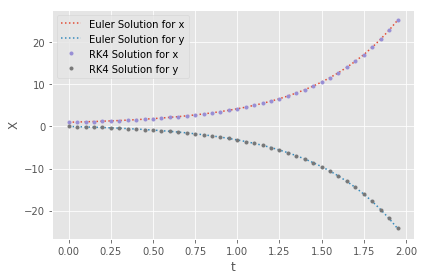

In [8]:
def check_type(y,t): # Ensure Input is Correct
    return y.dtype == np.floating and t.dtype == np.floating

class _Integrator():
    
    def integrate(self,func,y0,t):
        time_delta_grid = t[1:] - t[:-1]
        
        y = np.zeros((y0.shape[0],t.shape[0]))
        y[:,0] = y0

        for i in range(time_delta_grid.shape[0]):
            k1 = func(y[:,i], t[i])                               # RK4 Integration Steps
            half_step = t[i] + time_delta_grid[i] / 2
            k2 = func(y[:,i] + time_delta_grid[i] * k1 / 2, half_step)
            k3 = func(y[:,i] + time_delta_grid[i] * k2 / 2, half_step)
            k4 = func(y[:,i] + time_delta_grid[i] * k3, t + time_delta_grid[i])
            y[:,i+1]= (k1 + 2 * k2 + 2 * k3 + k4) * (time_delta_grid[i] / 6) + y[:,i]
        return y

def odeint_rk4(func,y0,t):
    y0 = np.array(y0)
    t = np.array(t)
    if check_type(y0,t):
        return _Integrator().integrate(func,y0,t)
    else:
        print("error encountered")
        
solution1 = odeint_euler(f,[1.,0.],t)
solution2 = odeint_rk4(f,[1.,0.],t)




plt.plot(t[::5],solution1[0,::5],":",label="Euler Solution for x")
plt.plot(t[::5],solution1[1,::5],":",label="Euler Solution for y")
plt.plot(t[::5],solution2[0,::5],".",label="RK4 Solution for x")
plt.plot(t[::5],solution2[1,::5],".",label="RK4 Solution for y")
plt.xlabel("t")
plt.ylabel("X")
plt.legend()
plt.tight_layout()
fig = plt.gcf()
fig.savefig("fig3.eps",format='eps')
plt.show()

As an **Exercise**, try to solve the equation of a simple pendulum and observe its dynamics using Euler Method and RK4 methods. The equation of motion of a simple pendulum is given by: $$\frac{d^2s}{dt^2}=L\frac{d^2\theta}{dt^2}=-g\sin{\theta}$$ where $L$ = Length of String and $\theta$ = angle made with vertical. To solve this second order differential equation you may use a dummy variable $\omega$ representing angular velocity such that:
$$\frac{d\theta}{dt}=\omega$$
$$\frac{d\omega}{dt}=-\frac{g}{L}\sin{\theta}$$